## Skill: SFNO vs FourCastNet
FourCastNet was the predecessor of SFNO. It also used FourierNeuralOperators but on a flat geometry. SFNO respects the spherical nature of the data manifold and therefore has a more stable rollout for long lead times, as demonstrated by this notebook.

In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pandas as pd
import matplotlib

ModuleNotFoundError: No module named 'cartopy'

## Total RMSE per timestep

In [ ]:
variable='total_column_water_vapour'
timestp='01012019'

In [ ]:
np_path   = "/mnt/V/Master/climate/skillscores/"+variable+"/"+timestp+"/"
rmse_sfno = np.load(np_path + "rmse_sfno_"+variable+"_"+timestp+"_fin.npy")
rmse_fcn  = np.load(np_path + "rmse_fcn_"+variable+"_"+timestp+"_fin.npy")
rmse_ref  = np.load(np_path + "rmse_ref_"+variable+"_"+timestp+"_fin.npy")

nans_sfno = np.load(np_path + "nans_sfno_"+variable+"_"+timestp+"_fin.npy")
nans_fcn  = np.load(np_path + "nans_fcn_"+variable+"_"+timestp+"_fin.npy")

In [75]:
times=pd.date_range(start='2019-01-01T06:00:00', end='2020-01-01', freq='6h')

In [76]:
matplotlib.rcParams.update({'font.size': 16})


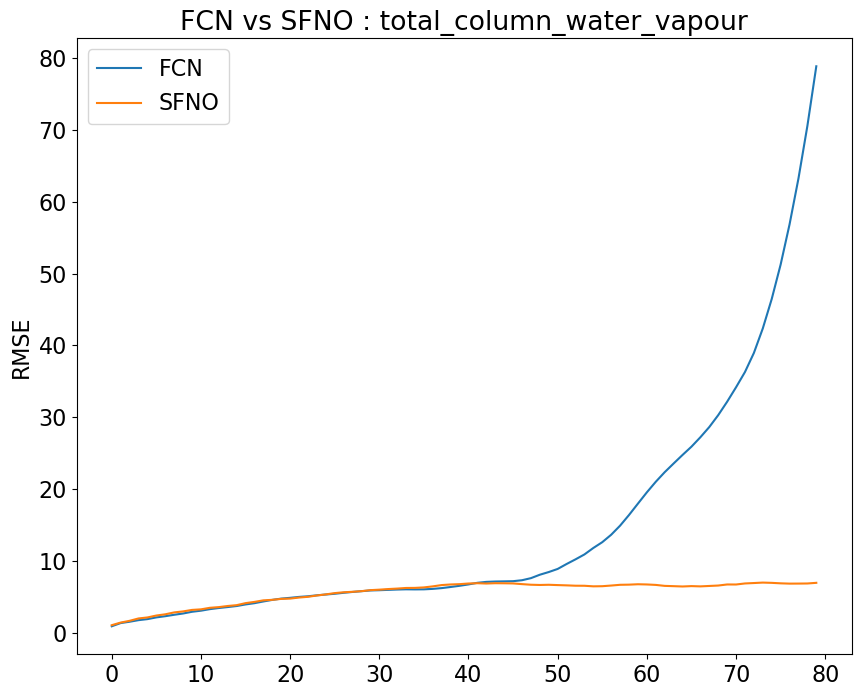

In [90]:
end=20*4
fig = plt.figure(figsize=(10,8))
plt.plot(rmse_fcn[:end],label="FCN")
plt.plot(rmse_sfno[:end],label="SFNO")
plt.ylabel("RMSE")
plt.title("FCN vs SFNO : "+variable)
plt.legend()
# fig.savefig(os.path.join(np_path,"figs/RMSE_FCN_"+variable+".png"))
plt.show()

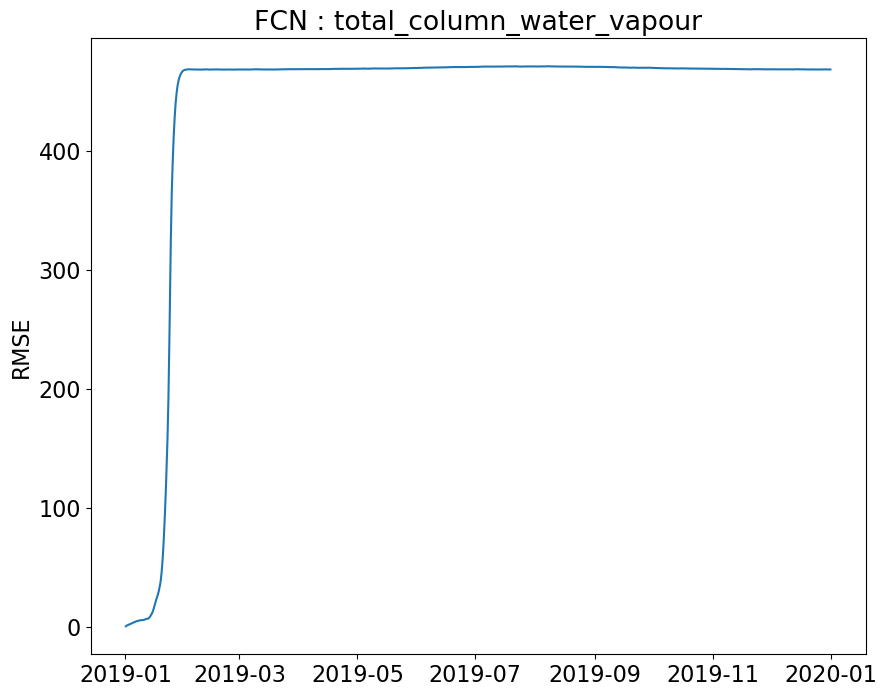

In [78]:

fig = plt.figure(figsize=(10,8))
plt.plot(times[:-1],rmse_fcn)
plt.ylabel("RMSE")
plt.title("FCN : "+variable)
fig.savefig(os.path.join(np_path,"figs/RMSE_FCN_"+variable+".png"))

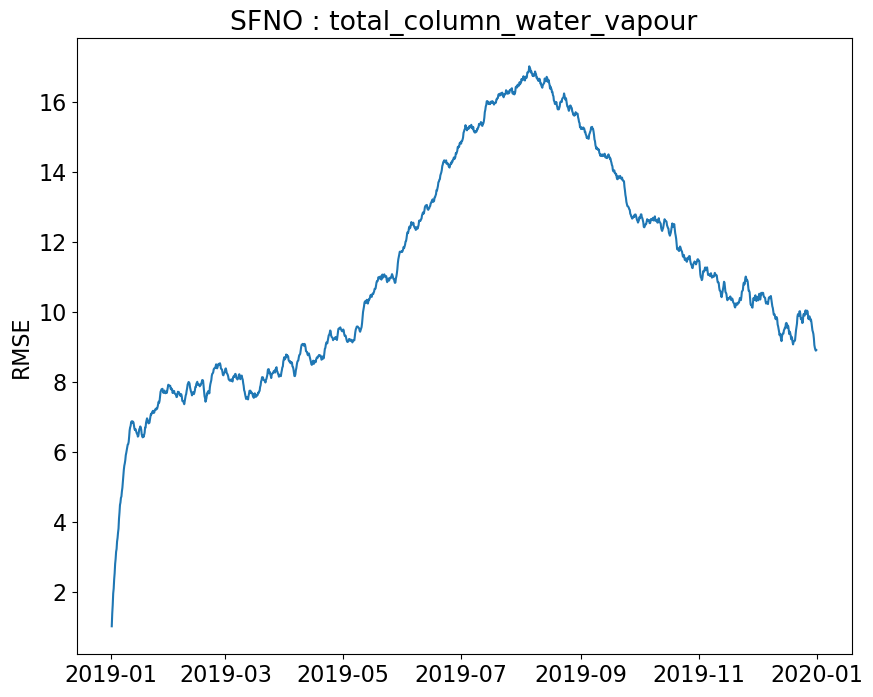

In [79]:


fig = plt.figure(figsize=(10,8))
plt.plot(times[:-1],rmse_sfno)
plt.ylabel("RMSE")
plt.title("SFNO : "+variable)
fig.savefig(os.path.join(np_path,"figs/RMSE_SFNO_"+variable+".png"))

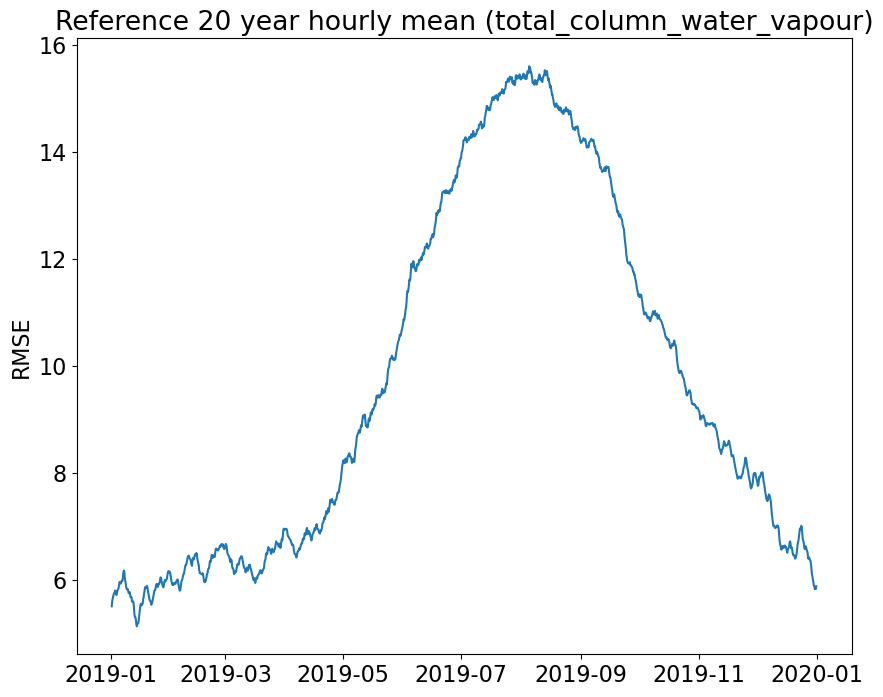

In [80]:

fig = plt.figure(figsize=(10,8))
plt.plot(times[:-1],rmse_ref)
plt.ylabel("RMSE")
plt.title("Reference 20 year hourly mean ("+variable+")")
fig.savefig(os.path.join(np_path,"figs/RMSE_ref_"+variable+".png"))

In [81]:
skill_fcn  = 1 - rmse_fcn /rmse_ref
skill_sfno = 1 - rmse_sfno/rmse_ref

In [82]:
zero_line = np.zeros(skill_fcn.shape)

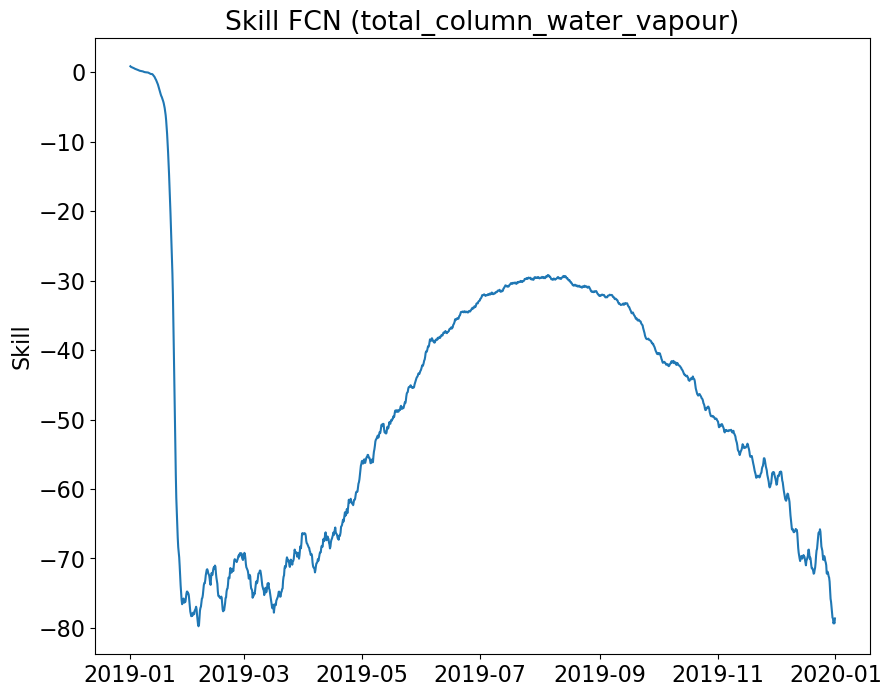

In [83]:
# Skill FCN
fig = plt.figure(figsize=(10,8))
plt.plot(times[:-1],skill_fcn)
plt.ylabel("Skill")
plt.title("Skill FCN ("+variable+")")
fig.savefig(os.path.join(np_path,"figs/Skill_"+variable+"_FCN.png"))

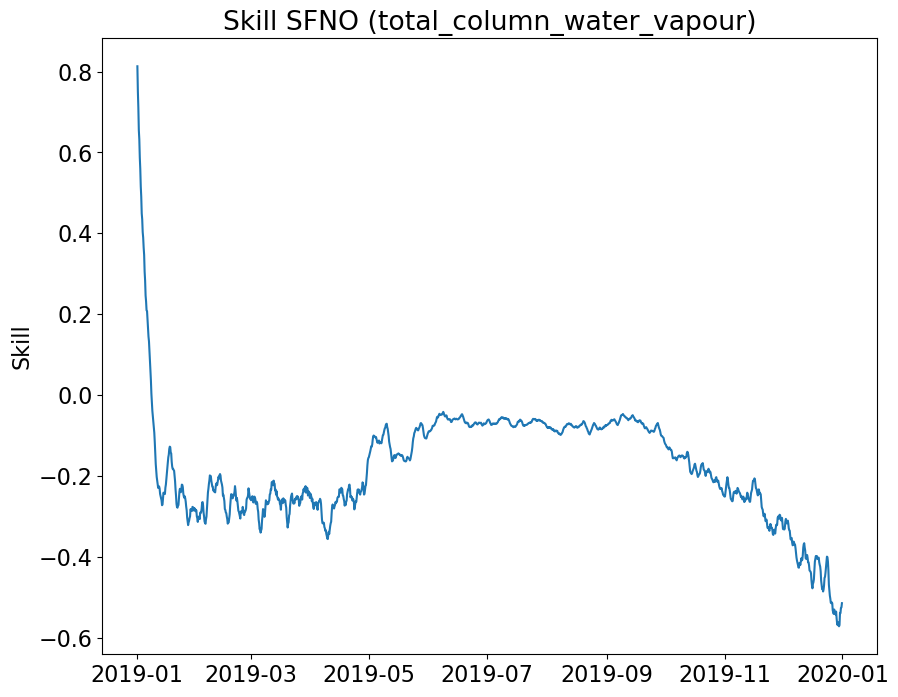

In [86]:
# Skill SFNO
fig = plt.figure(figsize=(10,8))
plt.plot(times[:-1],skill_sfno)
plt.ylabel("Skill")
plt.title("Skill SFNO ("+variable+")")
fig.savefig(os.path.join(np_path,"figs/Skill_"+variable+"_SFNO.png"))

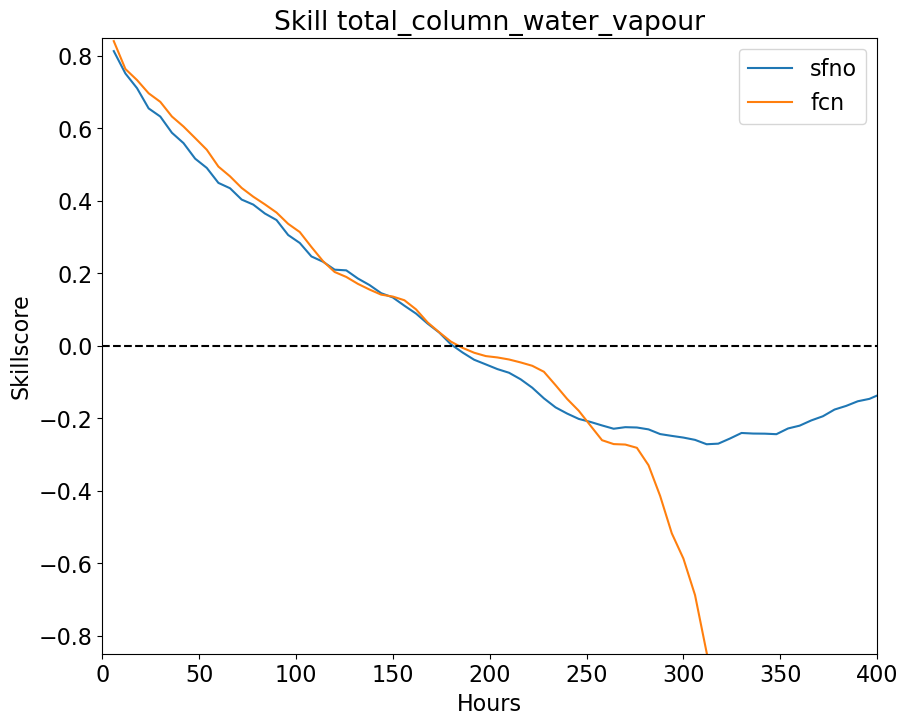

In [85]:
hrs = np.arange(6,365*24,6)
fig = plt.figure(figsize=(10,8))
plt.title("Skill "+variable)
plt.ylabel("Skillscore")
plt.xlabel("Hours")
plt.plot(hrs,skill_sfno,label="sfno")
plt.plot(hrs,skill_fcn,label="fcn")
# plt.plot(skill_sfno)
# plt.plot(skill_fcn)
plt.xlim(0,400)
plt.ylim(-0.85,0.85)
plt.hlines(y=0,xmin=0,xmax=1440,linestyles='--',color="black")
plt.legend()
fig.savefig(os.path.join(np_path,"figs/Skill_"+variable+".png"))